In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [7]:
# FUME data to numpy array
data_FUME=pd.read_csv('C:/Users/Assa/git/Domace_ulohySHMU/FUME.csv',sep=';',encoding='utf-8')
data_FUME=data_FUME.drop('Unnamed: 0',1)
# data in the numpy array
X=data_FUME
for i in data_FUME.columns:
    if i.startswith('concentracion'):
       X=X.drop(i,1)
X=X.values
# labels to the numpy array
y={}
for i in data_FUME.columns:
    if i.startswith('concentracion'):
       y[i]=data_FUME[i].values
print(X.shape)

(18952, 28)


In [8]:
#scaler = preprocessing.StandardScaler()
for e in np.arange(0,28): 
    X[:,e]=preprocessing.normalize(X[:,e].reshape(1,-1),'max')
for key in y.keys():
    y[key]=preprocessing.normalize(y[key].reshape(1,-1),'max')
    y[key]=y[key].transpose()
    print(y[key].max())
print(X.shape)
#print(y.values.shape)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
(18952, 28)


In [9]:
# SMOKE data in the numpy array
data_SMOKE=pd.read_csv('C:/Users/Assa/git/Domace_ulohySHMU/SMOKE.csv',sep=';',encoding='utf-8')
data_SMOKE=data_SMOKE.drop('Unnamed: 0',1)
X_S=data_SMOKE
for i in data_SMOKE.columns:
    if i.startswith('concentracion'):
       X_S=X_S.drop(i,1)
X_S=X_S.values
# labels to the numpy array
y_S={}
for i in data_SMOKE.columns:
    if i.startswith('concentracion'):
       y_S[i]=data_SMOKE[i].values

In [5]:
#import sys
#sys.modules[__name__].__dict__.clear()

In [10]:

X_train, X_test, y_train, y_test,lr ={},{},{},{},{}

In [11]:
# split training and test sets for the FUME data
for col in data_FUME.columns:
    if col.startswith('concentracion'):
        X_train[col], X_test[col], y_train[col], y_test[col] = train_test_split(
        X, y[col], random_state=0) # 0,25
        print(X_train)

{'concentracion_BAP': array([[0.0187872 , 0.03801964, 0.15255555, ..., 0.00972798, 0.09667775,
        0.01522301],
       [0.00899998, 0.04835848, 0.23058387, ..., 0.01225066, 0.11250522,
        0.02139293],
       [0.01957192, 0.04983448, 0.06850965, ..., 0.01854956, 0.09108894,
        0.02065915],
       ...,
       [0.04668127, 0.0571999 , 0.04221044, ..., 0.03469781, 0.1309427 ,
        0.04113961],
       [0.00337595, 0.0307218 , 0.15529659, ..., 0.01432466, 0.08703207,
        0.03441106],
       [0.02643401, 0.03202564, 0.03030025, ..., 0.00236667, 0.08160091,
        0.01469112]])}
{'concentracion_BAP': array([[0.0187872 , 0.03801964, 0.15255555, ..., 0.00972798, 0.09667775,
        0.01522301],
       [0.00899998, 0.04835848, 0.23058387, ..., 0.01225066, 0.11250522,
        0.02139293],
       [0.01957192, 0.04983448, 0.06850965, ..., 0.01854956, 0.09108894,
        0.02065915],
       ...,
       [0.04668127, 0.0571999 , 0.04221044, ..., 0.03469781, 0.1309427 ,
        0.0

In [12]:
# LinearRegression  model
for col in data_FUME.columns:
    if col.startswith('concentracion'):
        lr[col] = LinearRegression().fit(X_train[col], y_train[col])
        print(col)
        print("Training set score: {:.2f}".format(lr[col].score(X_train[col], y_train[col])))
        print("Test set score: {:.2f}".format(lr[col].score(X_test[col], y_test[col])))
        #print("Test johannes score: {:.2f}".format(lr[col].score(X_S, y_S[col])))

concentracion_BAP
Training set score: 0.88
Test set score: 0.87
concentracion_CO
Training set score: 0.56
Test set score: -0.38
concentracion_NO
Training set score: 0.47
Test set score: -0.26
concentracion_NO2
Training set score: 0.33
Test set score: 0.19
concentracion_O3
Training set score: 0.33
Test set score: 0.19
concentracion_SO2
Training set score: 0.43
Test set score: -0.04
concentracion_PM25
Training set score: 0.69
Test set score: 0.73
concentracion_PM10
Training set score: 0.69
Test set score: 0.64


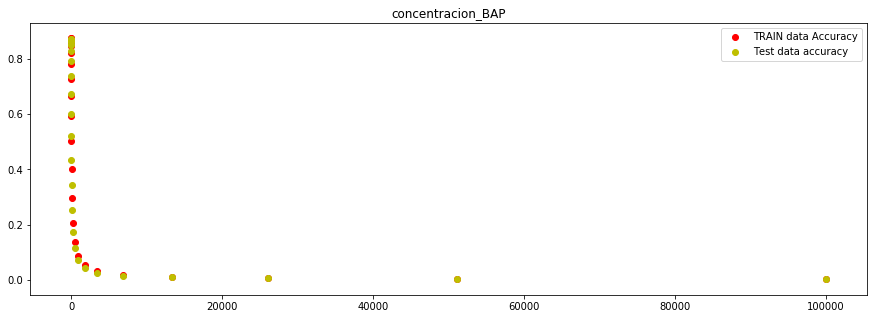

concentracion_BAP


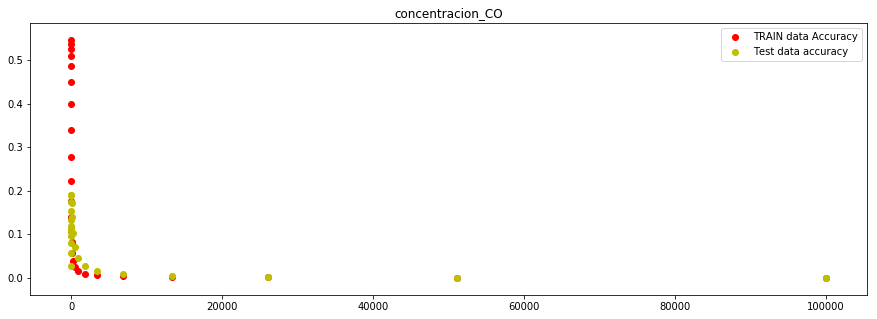

concentracion_CO


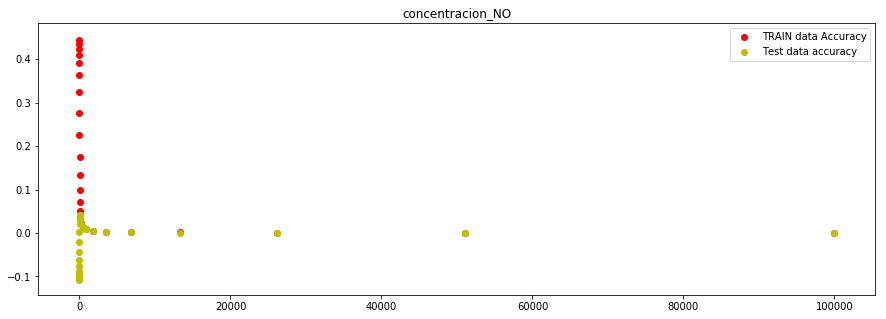

concentracion_NO


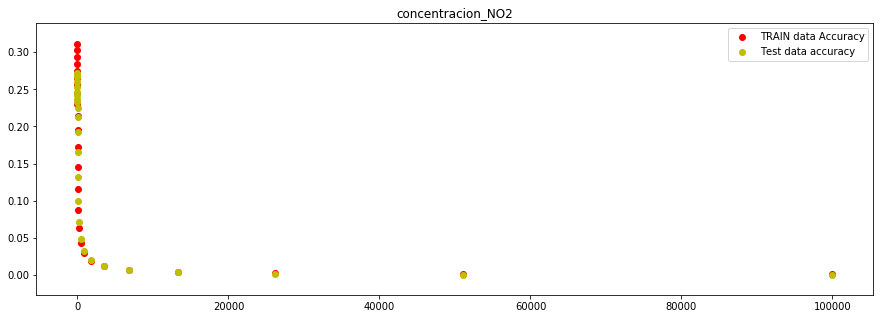

concentracion_NO2


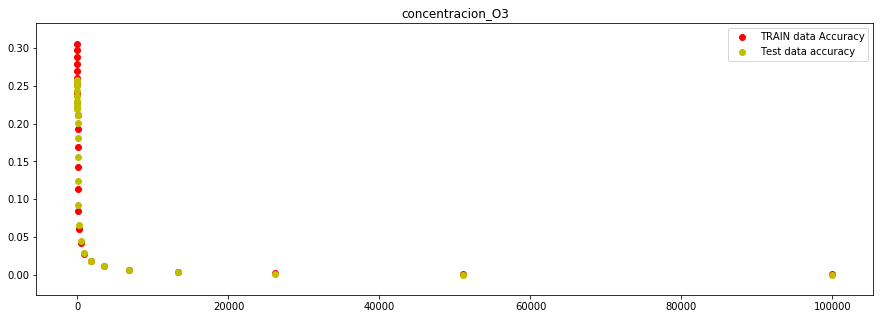

concentracion_O3


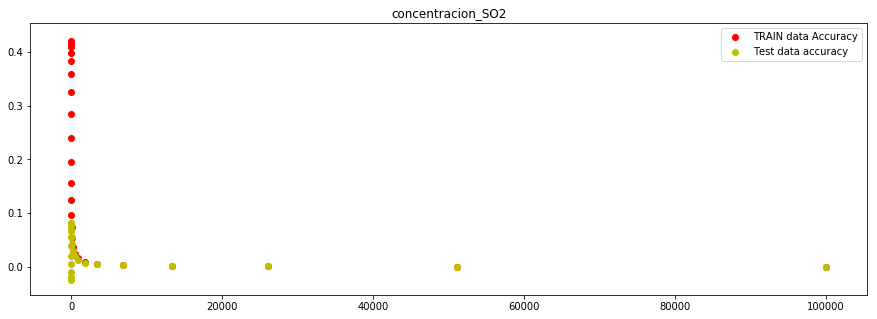

concentracion_SO2


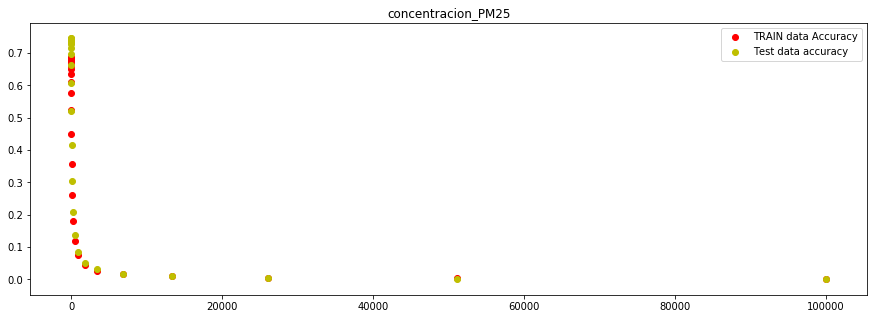

concentracion_PM25


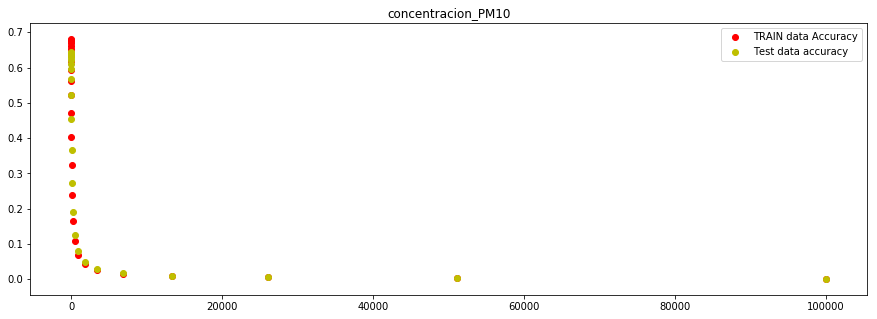

concentracion_PM10


In [13]:
# ridge model
t= np.zeros([8,25])# matice na okamžite ukladanie vysledkov
s= np.zeros([8,25])
rid={}
acc_train=pd.DataFrame() #dataframy na výsledky 
acc_test=pd.DataFrame()
conc_col=[]
for j,col in enumerate(data_FUME.columns):
    for i,a in enumerate(np.logspace(-1, 5, num=25, endpoint=True, base=10.0)):
        if col.startswith('concentracion'):
            rid[col]=Ridge(alpha=a).fit(X_train[col], y_train[col])
            
            t[j,i]=rid[col].score(X_train[col], y_train[col])
            s[j,i]=rid[col].score(X_test[col], y_test[col])
    #prevedenie výsledkov z matice na data framy - data frame sa lahšie plotuje
    if col.startswith('concentracion'):  
        conc_col.append(col)
        acc_train[col]=t[j,:]
        acc_test[col]=s[j,:]
#xsova os ktorá je rovnaká ako delenie z ktorého som brala alfy        
a=np.logspace(-2, 5, num=25, endpoint=True, base=10.0)
acc_train['x']=a
acc_test['x']=a 
#plotovanie výdlekov, progres v závislosti na alpha
for col in conc_col:
    plt.rcParams['figure.figsize'] = 15,5
    plt.scatter(acc_train['x'], acc_train[col] ,color='r', label='TRAIN data Accuracy')
    plt.scatter(acc_test['x'], acc_test[col] , color='y', label='Test data accuracy')
    plt.title('{0}'.format(col))
    plt.legend()
    plt.show()
    plt.close()
    print(col)

In [14]:
# Lasso model
las={}
# ridge model
t= np.zeros([8,25])
s= np.zeros([8,25])
acc_trainl=pd.DataFrame()
acc_testl=pd.DataFrame()
for j,col in enumerate(data_FUME.columns):
    for i,a in enumerate(np.logspace(-2, 5, num=25, endpoint=True, base=10.0)):

        if col.startswith('concentracion'):
            las[col] = Lasso(alpha=a, max_iter=1000000).fit(X_train[col], y_train[col])
            print("Number of features used: {}".format(np.sum(las[col].coef_ != 0)))
            #print(col)
            t[j,i]=las[col].score(X_train[col], y_train[col])
            s[j,i]=las[col].score(X_test[col], y_test[col])     
    if col.startswith('concentracion'):
        acc_trainl[col]=t[j,:]
        acc_testl[col]=s[j,:]
        print(col)


Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
concentracion_BAP
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of features used: 0
Number of 

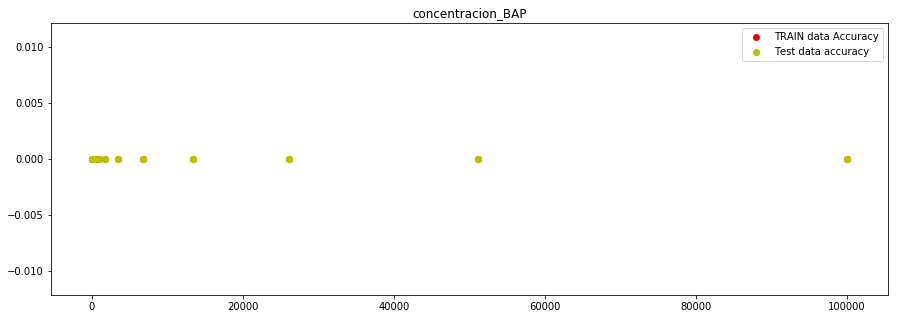

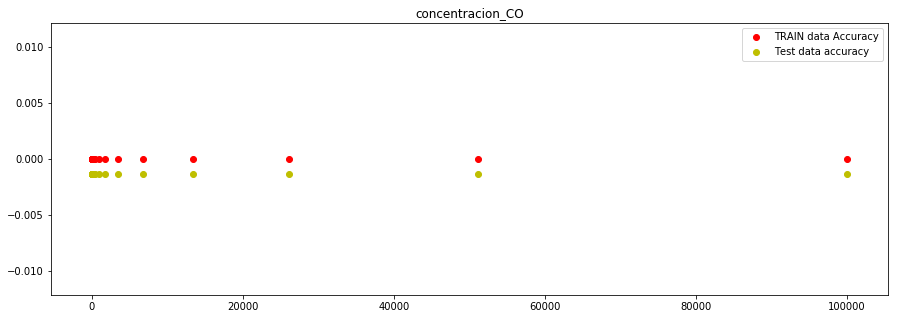

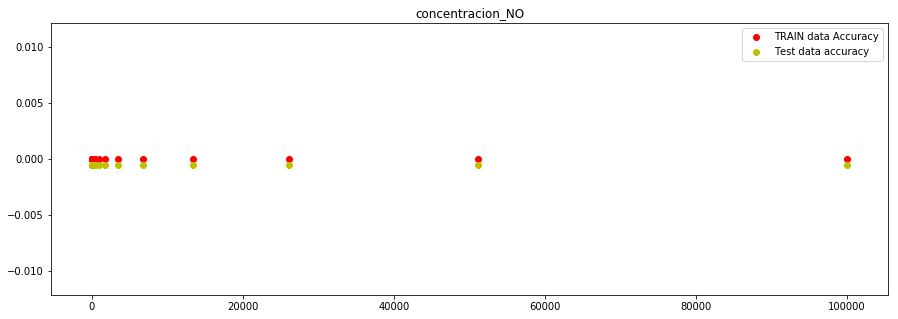

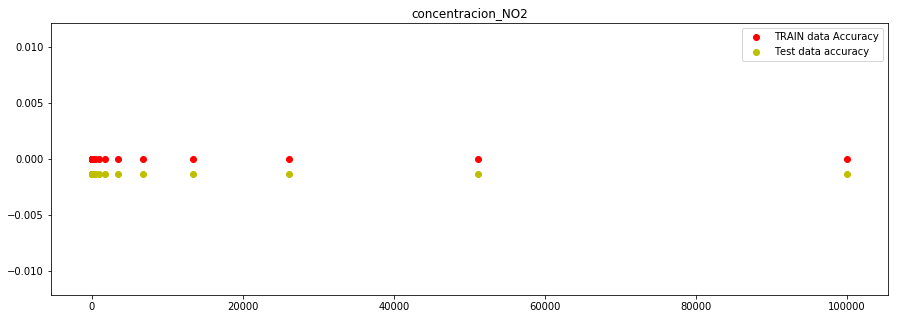

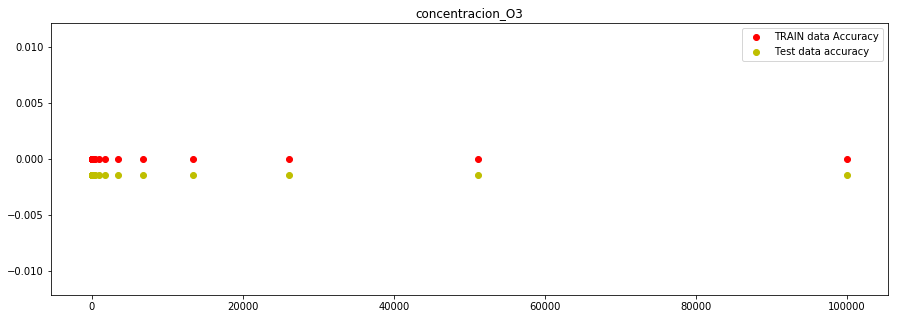

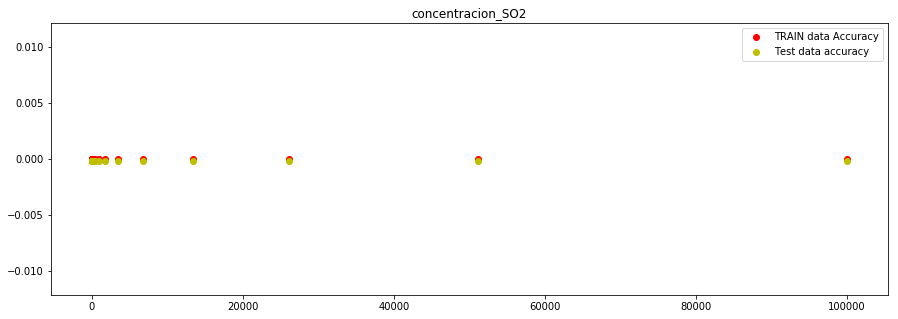

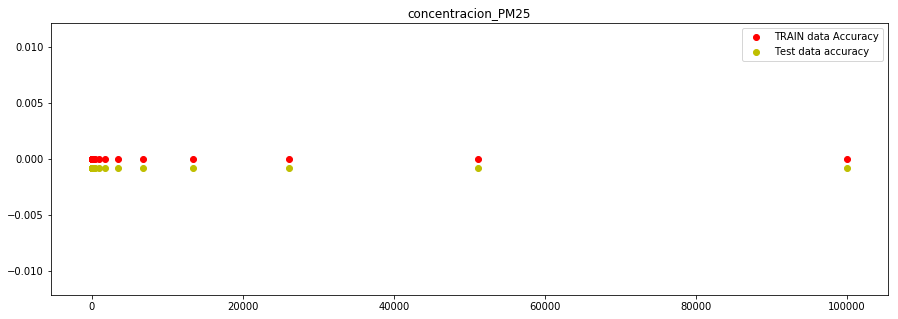

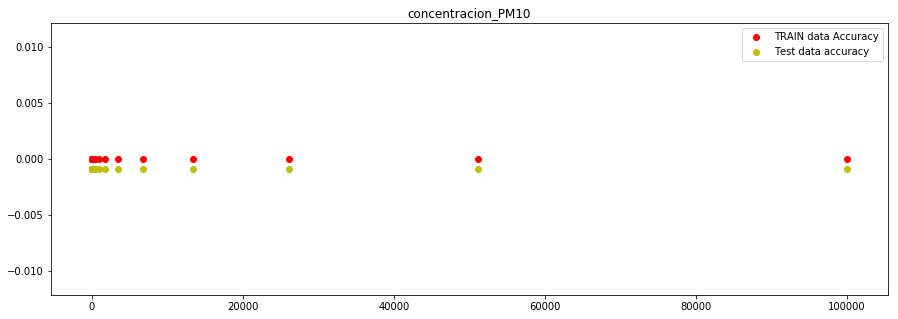

In [15]:
a=np.logspace(-2, 5, num=25, endpoint=True, base=10.0)
acc_trainl['x']=a
acc_testl['x']=a      
for col in conc_col:
    plt.rcParams['figure.figsize'] = 15,5
    plt.scatter(acc_trainl['x'], acc_trainl[col] ,color='r', label='TRAIN data Accuracy')
    plt.scatter(acc_testl['x'],acc_testl[col] , color='y', label='Test data accuracy')
    plt.title('{0}'.format(col))
    plt.legend()
    plt.show()
    plt.close()

concentracion_BAP
concentracion_CO
concentracion_NO
concentracion_NO2
concentracion_O3
concentracion_SO2
concentracion_PM25
concentracion_PM10


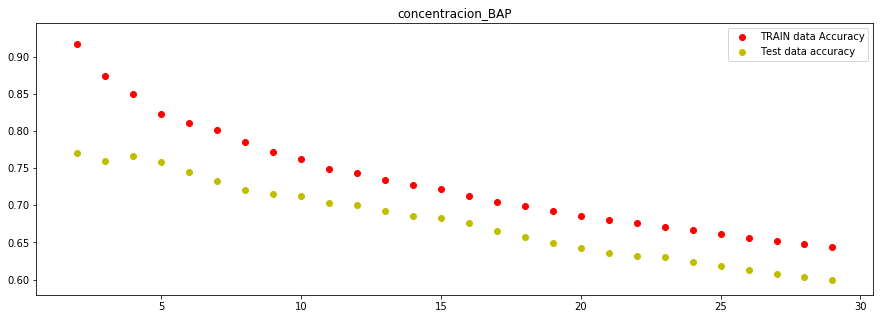

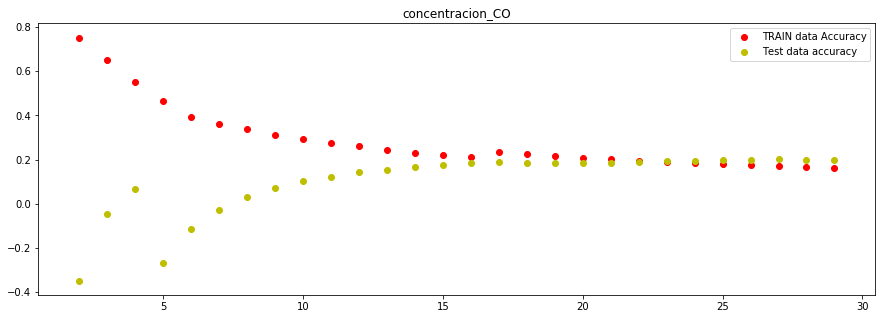

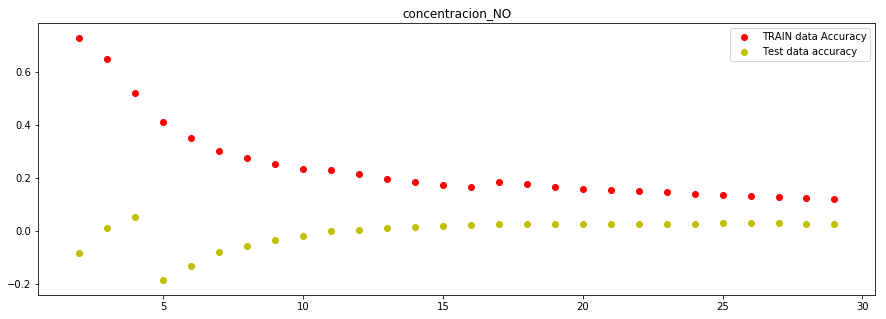

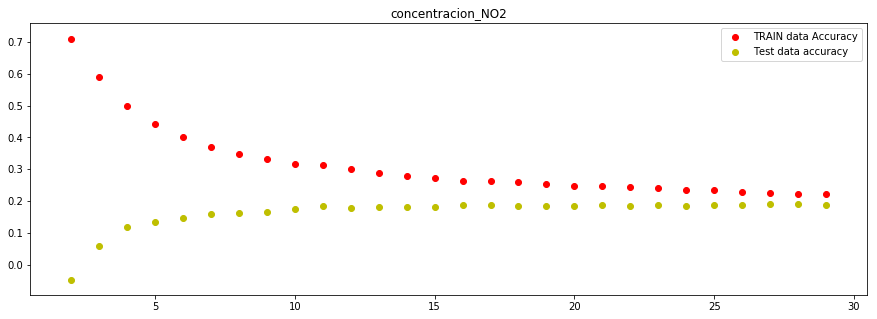

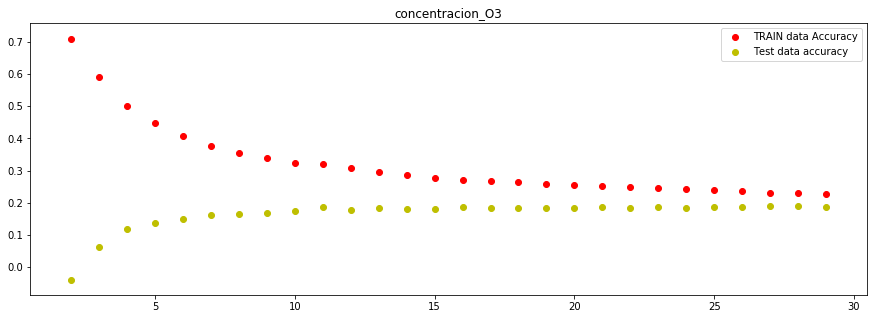

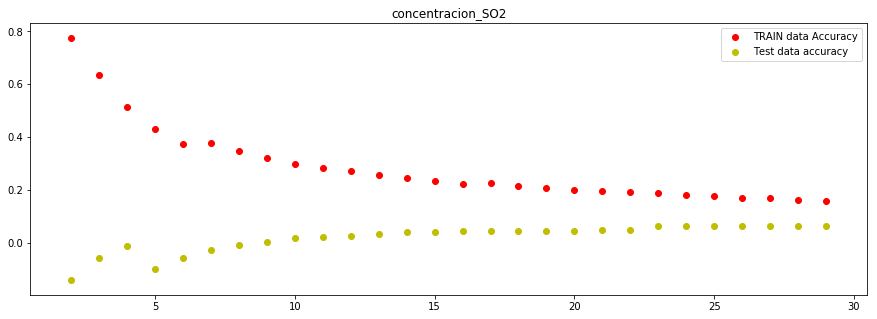

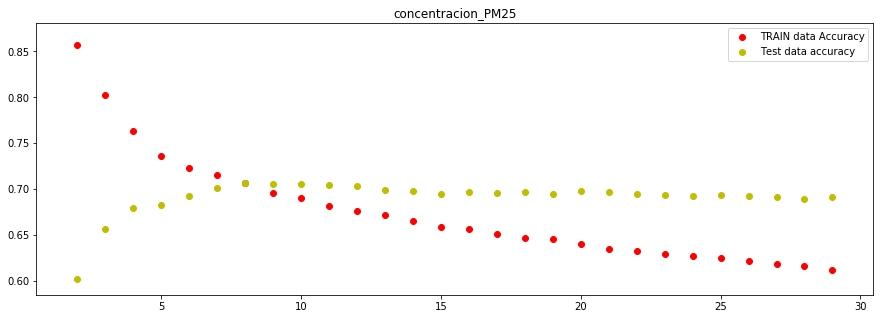

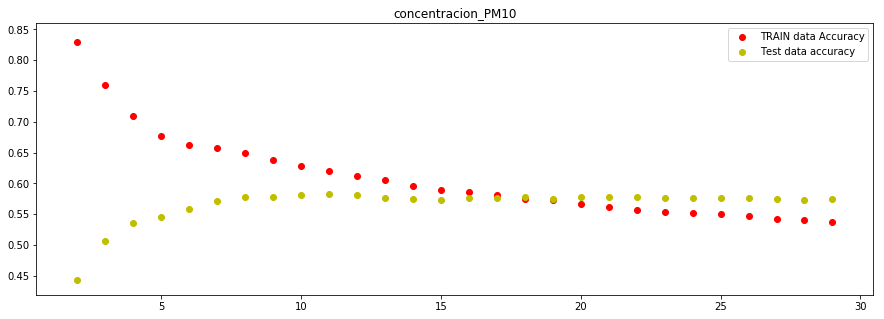

In [16]:
kn={}
t= np.zeros([8,28])
s= np.zeros([8,28])
df_train=pd.DataFrame()
df_test=pd.DataFrame()
for j,col in enumerate(data_FUME.columns):
    if col.startswith('concentracion'):
        for i,n in enumerate(np.arange(2,30)):
            clf = KNeighborsRegressor(n_neighbors=n)
            kn[col] = clf.fit(X_train[col], y_train[col])
            t[j,i]=kn[col].score(X_train[col], y_train[col])
            s[j,i]=kn[col].score(X_test[col], y_test[col])
    if col.startswith('concentracion'):
        df_train[col]=t[j,:]
        df_test[col]=s[j,:]
        print(col)

a=np.arange(2,30)
df_train['x']=a
df_test['x']=a      
for col in conc_col:
    plt.rcParams['figure.figsize'] = 15,5
    plt.scatter(df_train['x'], df_train[col] ,color='r', label='TRAIN data Accuracy')
    plt.scatter(df_test['x'], df_test[col] , color='y', label='Test data accuracy')
    plt.title('{0}'.format(col))
    plt.legend()
    plt.show()
    plt.close()

In [17]:
clf = KNeighborsRegressor(n_neighbors=100,weights='distance',p=2)
kn1={}
for col in data_FUME.columns:
    if col.startswith('concentracion'):
        kn1[col] = clf.fit(X_train[col], y_train[col])
        print(col)
        print("Training set score: {:.2f}".format(kn1[col].score(X_train[col], y_train[col])))
        print("Test set score: {:.2f}".format(kn1[col].score(X_test[col], y_test[col])))
       # print("Test johannes score: {:.2f}".format(kn1[col].score(X_S, y_S[col])))

concentracion_BAP
Training set score: 1.00
Test set score: 0.48
concentracion_CO
Training set score: 1.00
Test set score: 0.20
concentracion_NO
Training set score: 1.00
Test set score: 0.02
concentracion_NO2
Training set score: 1.00
Test set score: 0.16
concentracion_O3
Training set score: 1.00
Test set score: 0.16
concentracion_SO2
Training set score: 1.00
Test set score: 0.06
concentracion_PM25
Training set score: 1.00
Test set score: 0.63
concentracion_PM10
Training set score: 1.00
Test set score: 0.52
